Any general deterministic first order differential equation can be written as

$$
\frac{d}{dt} X = f(X, t)
$$

where, $f(X, t)$ is a continuous function of $x$ and $t$. This has a well defined time evolution. Now if we want to model stochastic problems using this equation, then we need to add some probabilistic term. So this is what we are going to model here, how to model stochastic process. In general we will be interested in update formulas as that is what we do numerically. So, the **update formula** for our general first order equation is 

$$
X(t+dt) = X(t) + f(X, t) dt
$$

Lets define some terminologies used frequently.

**Continuous Markov process**: A random variable $X(T)$ can be parametrized in terms of $t$ such that variable $X(t_1)$ and $X(t_2)$ are in general two random variables . A general stochastic process, can then be modeled using this random variable $X(t)$. X will be called a *continuous Markov process* if
   
* the process is *memoryless*, i.e, the next step depends only on the previous steps. And hence, update formula looks like
$$
\Xi = X(t+dt) - X(t)
$$
And hence, by definition ensures that the process is *memoryless* as $X(t+dt)$ depends *only* on the  $X(t)$.
* $\Xi$ depends smoothly on $X, t, dt$
* $X$ is a continuous variable in the sense that $\Xi\rightarrow 0$ as $dt\rightarrow 0$.

**Langevin equation**
These three condition decide the fate of the update formula in general. Now if we also want to model stochasticity, then we should bring some probabilistic term here.  The most general form of the update formula looks like
$$
\Xi = f(X, t)dt + \sqrt{D} N(0, 1) \sqrt{dt}
$$

where, $f(X, t)$ is any continuous function and $D>0$ is another smooth, well-behaved function! N(0,1) is Normal distribution with zero mean and unit variance. Now this function has this form because of the *self-consistency* condition, such that increment in the sub-interval should be same as that in a full interval (See, *DT Gillespie - American Journal of Physics, 1996*).

Since, we agreed on the thing that the $X$ is a random variable and hence at each random instant $X(t_i)$ is independent and hence the sum of all those random variables approach a [Normal distribution](http://rajeshrinet.github.io/blog/central-limit-theorem/).
Also, the flu cation is measured by the standard deviation. So the most general form of the equation is 

$$
X(t+dt)= X(t) + \sqrt{D} N(0, 1) \sqrt{dt}
$$

This equation is the Langevin equation in the update formula form. It is obvious that the corresponding differential equation of this equation is not well defined (try dividing throughout by dt!). 

The probability density p(x, t) of the variable satisfies the *Fokker–Planck equation*.

$$
\frac{\partial}{\partial t}p(x,t) = -\frac{\partial}{\partial x}\left[f(x,t)p(x,t)\right] + \frac{\partial^2}{\partial x^2}\left[ D(x,t)p(x,t)\right].
$$

For a **Weiner process**, where the drift term is zero, *Fokker–Planck equation*, reduces to the diffusion equation.


The update equation form of the Langevin equation can be made more familiar by dividing throughout by dt and then taking the limit $dt\rightarrow 0$ with a  pinch of salt!

$$
\frac{d}{dt} X = f(X, t) + \sqrt{D(X, t)} \Gamma(t)
$$

where $\Gamma = \lim_{dt\rightarrow 0} N(0, 1/dt)$ is a Gaussian distribution with zero mean and infinite variance. This equation is called the *white noise* form of the Langevin equation.

$$
\langle \Gamma(t) \rangle = 0\\
\langle \Gamma(t) \Gamma(t')\rangle = \delta(t-t') 
$$

**Ornstein–Uhlenbeck process (OUP)**

If the drift term is proportional to position and diffusion term is constant then we have what is called the OUP.

$$
f(x, t) = -x/\tau,   \qquad \qquad D = c
$$

So the corresponding Langevin equation for OUP is 

$$
\frac{d}{dt} X = -\frac{X}{\tau} + c^{1/2}  \Gamma(t)
$$

As the addition of two Gaussian number is another Gaussian distribution. So OUP implies that X(t) is Gaussian for all times. Infinite relaxation ($\tau\rightarrow \infty$) is the **Weiner process**. 


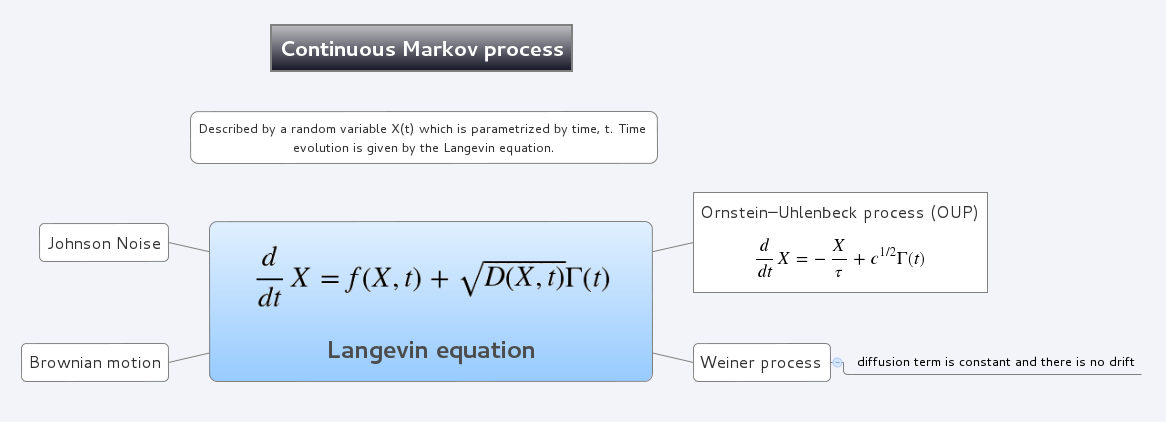

In [2]:
from IPython.core.display import Image 
Image(filename='plots/langevin-equation.png') 

### Johnson noise

For a L-R circuit, Kirchhoff's law can be written such that

$$
\frac{d}{dt} I = -I\frac{R}{L} + c^{1/2}\Gamma
$$

where $\Gamma$ is the Gaussian white noise. The noise is generated by thermal agitation of electrons. The equation can be readily mapped to OUP and more calculations can be done on similar lines. 

### Einstein-Smoluchowski relation

Lets consider the density to be $\rho(x)$. Then by Fick's law, the diffusive part of the current is 

$$
j_{diffusion}(x) = -D \frac{d  \rho}{dx}
$$

while there is another part of the current due to the constant drift which is,

$$
j_{drift} = \rho v = \rho~ \mu F
$$

where, $\mu$ is the mobility. At equilibrium, 

$$
j_{diffusion}  + j_{drift} = 0
$$

Now, $\rho = \rho_0 e^{-U/k_B T}$. And hence the condition of the equilibrium boils down to

$$
\frac{D}{k_B T} \frac{dU}{dx} \rho = \mu \rho   \frac{dU}{dx}
$$

And, hence we arrive at the Einstein equation

$$
D = \mu k_B T
$$


## References

* N. G. van Kampen, Itô versus Stratonovich, J. Stat. Phys. 24, 175–187 (1981).

* C. W. Gardiner, Handbook of stochastic methods, Vol. 3 (Springer Berlin, 1985).

* N. G. van Kampen, Stochastic processes in physics and chemistry, Vol. 1 (Elsevier, 1992).

* Y. L. Klimontovich, Itô, Stratonovich and kinetic forms of stochastic equations, Physica A: Stat. Mech. Appl. 163, 515–532 (1990).

* Y. L. Klimontovich, Nonlinear Brownian motion, Physics-Uspekhi 37, 737–766 (1994).

* A. W. C. Lau and T. C. Lubensky, State-dependent diffusion: Thermodynamic consistency and its path integral formulation, Phys. Rev. E 76, 011123 (2007).

* G. Volpe, L. Helden, T. Brettschneider, J. Wehr, and C. Bechinger, Influence of noise on force measurements, Phys. Rev. Lett. 104, 170602 (2010).

* G. Volpe and J. Wehr, Effective drifts in dynamical systems with multiplicative noise: a review of recent progress, Rep.Prog. Phys. 79, 053901 (2016).

* R. Mannella and P. V. E. McClintock, Comment on “influence of noise on force measurements", Phys. Rev. Lett. 107, 078901 (2011).

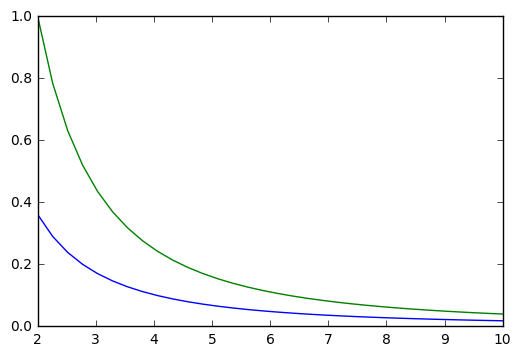

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(2, 10, 32)
plt.plot(x, 1/x**2 + 1/(x+1)**2)
plt.plot(x, 4/x**2);